In [1]:
#OUTDIR=#path/to/output/directory
OUTDIR="/nrnb/ukb-majithia/data/exome_debug/final"

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

### SNP/Exome Comparison


In [9]:
exome_maf = pd.read_csv(OUTDIR + "/exome_maf_final.tsv", sep="\t", index_col=0)
snp_maf = pd.read_csv(OUTDIR + "/snp_maf_final.tsv", sep="\t", index_col=6)

In [10]:
exome_maf.columns

Index(['A1', 'A2', 'MAF', 'NCHROBS'], dtype='object')

In [11]:
exome_maf.head()

,A1,A2,MAF,NCHROBS
SNP,,,,
1:946538:G:A,A,G,0.06845,401280
1:953858:G:A,A,G,0.05355,401276
1:962358:C:T,T,C,0.06563,401278
1:1014228:G:A,A,G,0.39290,401286
1:1043382:G:A,A,G,0.01179,401286


In [12]:
snp_maf.head()

,ID,A1,A2,MAF,NCHROBS,ID2
SNP,,,,,,
1:946538:G:A,rs35471880,A,G,0.06663,394714,rs35471880
1:953858:G:A,rs3828049,A,G,0.05322,400522,rs3828049
1:962358:C:T,rs6696971,T,C,0.06551,400386,rs6696971
1:1014228:G:A,Affx-15871198,A,G,0.39300,400350,Affx-15871198
1:1043382:G:A,rs138288952,A,G,0.01177,400872,rs138288952


In [13]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
import matplotlib.pyplot as plt
import seaborn as sns; sns.set
import numpy as np

In [14]:
df_maf = snp_maf.join(exome_maf, how="left", lsuffix=' snpchip', rsuffix=' exome')

In [15]:
df_maf.head()

,ID,A1 snpchip,A2 snpchip,MAF snpchip,NCHROBS snpchip,ID2,A1 exome,A2 exome,MAF exome,NCHROBS exome
SNP,,,,,,,,,,
1:946538:G:A,rs35471880,A,G,0.06663,394714,rs35471880,A,G,0.06845,401280
1:953858:G:A,rs3828049,A,G,0.05322,400522,rs3828049,A,G,0.05355,401276
1:962358:C:T,rs6696971,T,C,0.06551,400386,rs6696971,T,C,0.06563,401278
1:1014228:G:A,Affx-15871198,A,G,0.39300,400350,Affx-15871198,A,G,0.39290,401286
1:1043382:G:A,rs138288952,A,G,0.01177,400872,rs138288952,A,G,0.01179,401286


In [16]:
df_maf["MAF exome"] = df_maf["MAF exome"].replace(to_replace=float('nan'), value=0.0) 
print(df_maf["MAF exome"].shape)
print(df_maf["MAF snpchip"].shape)

(24080,)
(24080,)


<Figure size 432x288 with 0 Axes>

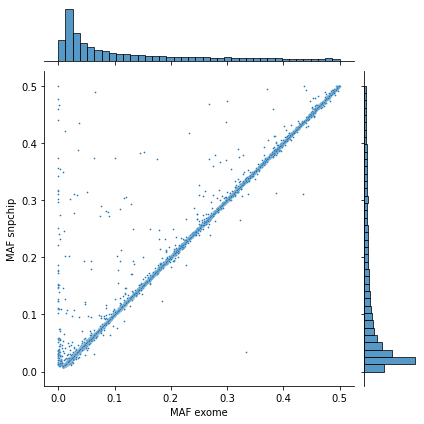

In [17]:
plt.figure()
sns.jointplot(x='MAF exome', y='MAF snpchip',data=df_maf, s=3, marginal_kws=dict(bins=np.linspace(0, 0.5,40)))
plt.savefig(OUTDIR + "/snp_vs_exome_comparison.png")

### gnomAD/exome comparison

In [ ]:
df = pd.read_csv(OUTDIR+"/combined_data.txt", sep="\s+", header=None)
df.columns = ["CHR", "Gene", "UKBB", "gnomAD"]
df.head()

In [ ]:
plt.figure()
fig=sns.jointplot(y="gnomAD", x="UKBB", data=df, s=1, xlim=(-40, 3000), ylim=(-40, 3000), marginal_kws=dict(bins=list(range(0,31000,100))))
plt.savefig(outdir+"/gnomad_v_exome_comparison.png")
